# **Project 1 - Boston AirBnb Analysis**

The dataset is available at https://www.kaggle.com/airbnb/boston

There are 3 files in the dataset:

1.calendar.csv

2.listings.csv

3.reviews.csv
# Data Science Process: CRISP-DM

CRISP-DM is a Cross Industry Standard Process for Data Mining, has 6 major phases:

1) Business Understanding

- Q1.Find the most popular neighbourhood in Boston 
- Q2.Common Price Listings of AirBnb
- Q3.Top Amenities

2) Data Understanding

- Understand the data by having a quick look at the features 

3) Prepare Data and 4) Model Data will cover following:

- Gather necessary data 
- Handle categorical and missing data
- Provide insight into the methods you chose and why you chose them
- Analyze, Model, and Visualize

5) Evaluate the Results against business questions at 1) 6) Deployement

- The deployement of the project will be represented as an effective communication of the results & findings in a form of a blog post @medium


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer 
%matplotlib inline


listing_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/listings.csv')
calendar_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/calendar.csv')
reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/reviews.csv')
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


# Understanding listings.csv

In [3]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [4]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [5]:
listing_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
listing_df['host_location'].value_counts()

Boston, Massachusetts, United States              2421
US                                                 521
New York, New York, United States                  113
Montreal, Quebec, Canada                            59
Middlesex County, Massachusetts, United States      50
                                                  ... 
Chongqing, Chongqing, China                          1
Chatham, Massachusetts, United States                1
USA                                                  1
Boston Massachusetts, Roslindale Neighborhood        1
Schaumburg, Illinois, United States                  1
Name: host_location, Length: 176, dtype: int64

In [7]:
listing_df['city'].value_counts()

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Brookline                      18
Jamaica Plain                  18
Cambridge                      16
Brighton                       15
Charlestown                    15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
Hyde Park                       2
Jamaica Plain                   2
ALLSTON                         2
South Boston                    2
Boston, Massachusetts, US       2
Jamaica Plain, Boston           2
Boston                          1
boston                          1
Brighton                        1
east Boston                     1
Boston (Jamaica Plain)          1
Roslindale, Boston              1
Watertown                       1
Boston (Charlestown)            1
dorchester, bo

In [8]:
listing_df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                  32
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                       15
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                  14
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitc

In [9]:
listing_df['neighbourhood_group_cleansed'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: neighbourhood_group_cleansed, dtype: float64

In [10]:
neighbourhood_cols = ['id', 'property_type', 'room_type', 'neighbourhood', 
                      'neighbourhood_cleansed','zipcode', 'price']

neighbourhood_listings = listing_df[neighbourhood_cols]
neighbourhood_listings.tail()

,id,property_type,room_type,neighbourhood,neighbourhood_cleansed,zipcode,price
3580,8373729,Apartment,Private room,Somerville,Charlestown,02143,$69.00
3581,14844274,Apartment,Private room,NaN,Allston,02446,$150.00
3582,14585486,Apartment,Entire home/apt,NaN,Charlestown,02141,$198.00
3583,14603878,Apartment,Private room,Somerville,Charlestown,02145,$65.00
3584,14504422,Apartment,Private room,Somerville,Charlestown,02145,$65.00


# Understanding reviews.csv


In [11]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [12]:
reviews_df.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [13]:
reviews_df_subset = reviews_df.drop(['reviewer_name'], axis = 1)

In [14]:
reviews_df.groupby(['listing_id']).agg({'comments':'count'})

,comments
listing_id,
3353,34
5506,36
6695,47
6976,41
8792,18
...,...
14813006,1
14823724,1
14842237,1


In [15]:
listing_df.groupby(['id']).agg({'number_of_reviews':'sum'})


,number_of_reviews
id,
3353,34
5506,36
6695,47
6976,41
8792,18
...,...
14924831,0
14928000,0
14928333,0


# Understanding Calender.csv

In [16]:
calendar_df.head()
calendar_df.shape

(1308890, 4)

# Most popular Neighbourhood in Boston

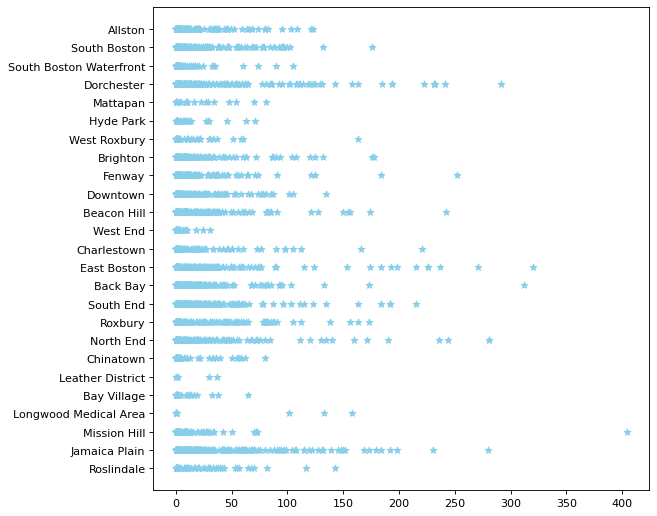

In [74]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(listing_df['number_of_reviews'], listing_df['neighbourhood_cleansed'], c = 'skyblue', marker = "*")
plt.show()

The most popular neighbourhoods in Boston according to the number of the reviews left are the following:

1) Mission Hill with over 400 reviews

2) East Boston  with nearly 350 and 

3) Back Bay with around 310 reviews

Areas such as Dorchester, Jamaica Plain and North End are next with reviews ranging betweem 250-300.

Above findings are soulely based on the number of reviews in total, it does not reflectt only positive reviews, the main assumption here is that the more reviews left in one particular area means the popularity of this area among renters in Boston.



*Avaialability of the AirBnbs*

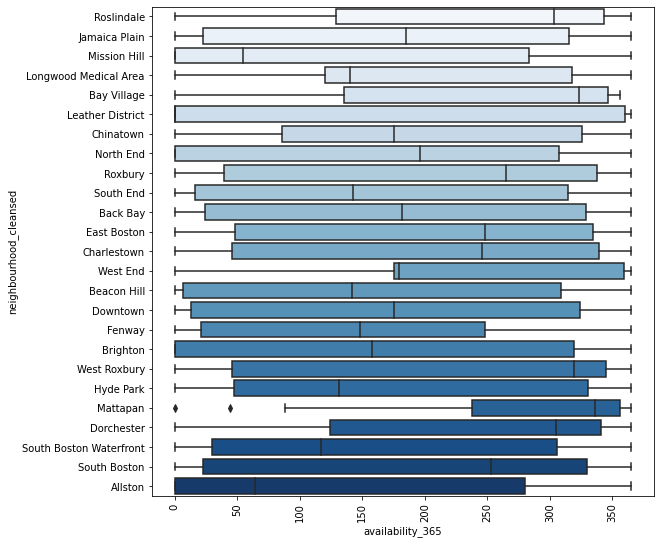

In [75]:
plt.figure(figsize = (9,9))
plt.xticks(rotation=90)
ax = sns.boxplot(data=listing_df, x = 'availability_365', y = 'neighbourhood_cleansed', palette = 'Blues')

To back the above assumption which is purely based on the reviews, if we have a look at the availability throughout the year in the neighbourhood areas:

1) Mission Hill 50/365 days

2) East Boston 250/365

3) Back Bay 180/365

 And Dorchester 300/365, Jamaica Plain 180/365 and North End 200/365 days
The point is more or less proven, the Mission Hill area which has the highest number of reviews, shows also only 50 days availability throughout the year. 


While Leather District is avialable (365/365) and it also has the lowest number of reviews, 50.
It is helpful to see the prices in each neihbourhood too, to come up with the final conclusions.

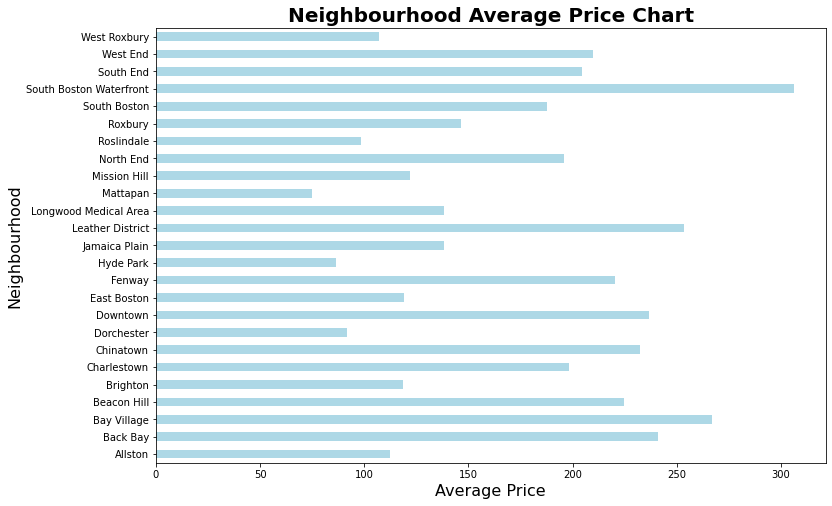

In [123]:
price_per_neighbourhood = listing_df.groupby(['neighbourhood_cleansed']).price.mean()
plt.figure(figsize=(12,8));
price_per_neighbourhood.plot(kind='barh', color='lightblue');
plt.xlabel('Average Price', size =16)
plt.ylabel('Neighbourhood', size =16)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);



As per the price,


*South Boston Waterfront*, *Bay Village* and *Leather District* are the most expensive areas to airbnb in Boston, which explains the lack of demand to these areas among renters and all is topped up with the small number of reviews.

While, 

1) *Mission Hill* has the average price of 120, which is more than twice cheaper the South Boston Waterfront, which makes the neighbourhood more attractive for visitors.

2) East Boston has the same average price as Mission Hill

3) Back Bay area's average price is almost 250 per night

# Most common price listings for AirBnb


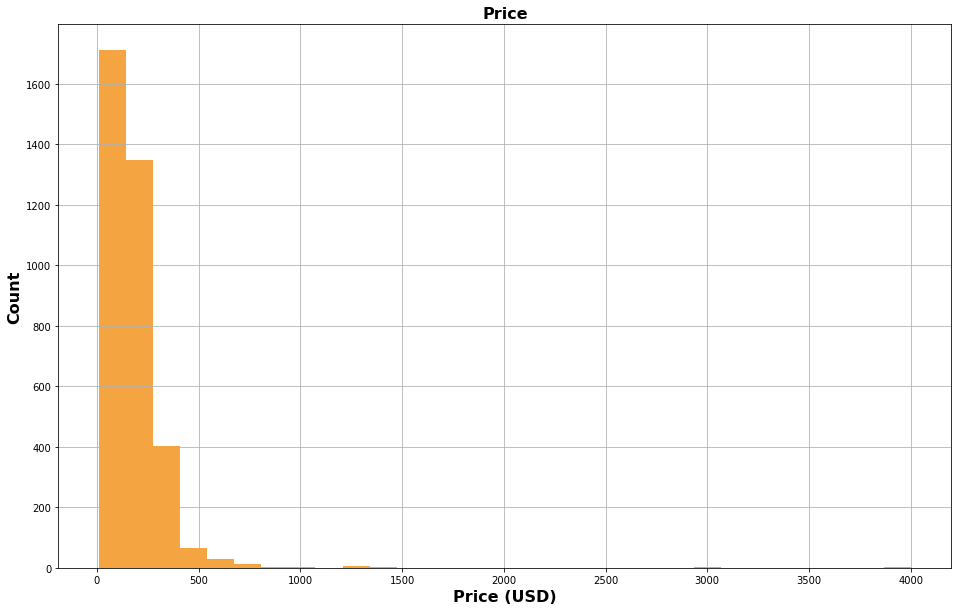

In [101]:
plt.figure(figsize=(16, 10));
listing_df['price'].hist(bins = 30, color='#f5a442');
plt.title('Price', size = 16, weight = 'bold');
plt.ylabel('Count', weight = 'bold', size = 16);
plt.xlabel('Price (USD)', weight = 'bold', size= 16);

The above graph show that there are lot of AirBnBs with price in the range of 0-500USD and very few above 500$. Maximum price for an AirBnB in Boston is near 400USD. 

In [120]:
listing_df[listing_df['price'] > 500]['price'].count()

66

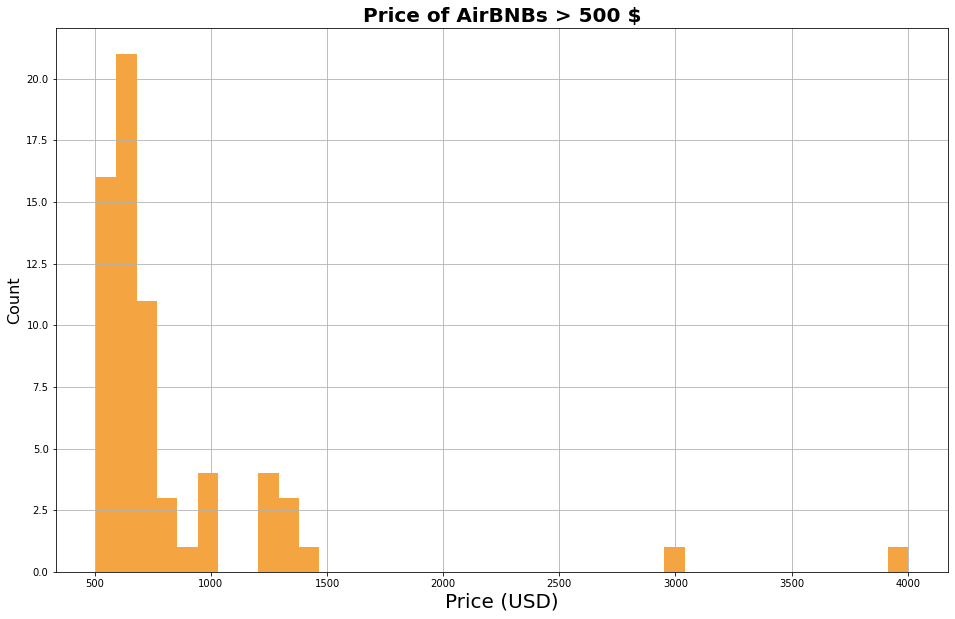

In [117]:
plt.figure(figsize=(16, 10));
listing_df[listing_df['price'] > 500]['price'].hist(bins=40, color='#f5a442');
plt.title('Price of AirBNBs > 500 $', size = 20, weight = 'bold');
plt.ylabel('Count',size = 16);
plt.xlabel('Price (USD)',  size = 20);

There are only 66 listings in Boston with price greater than 500USD and most of them are below 1000$.

---



In [121]:
listing_df[listing_df['price'] < 500]['price'].count()

3495

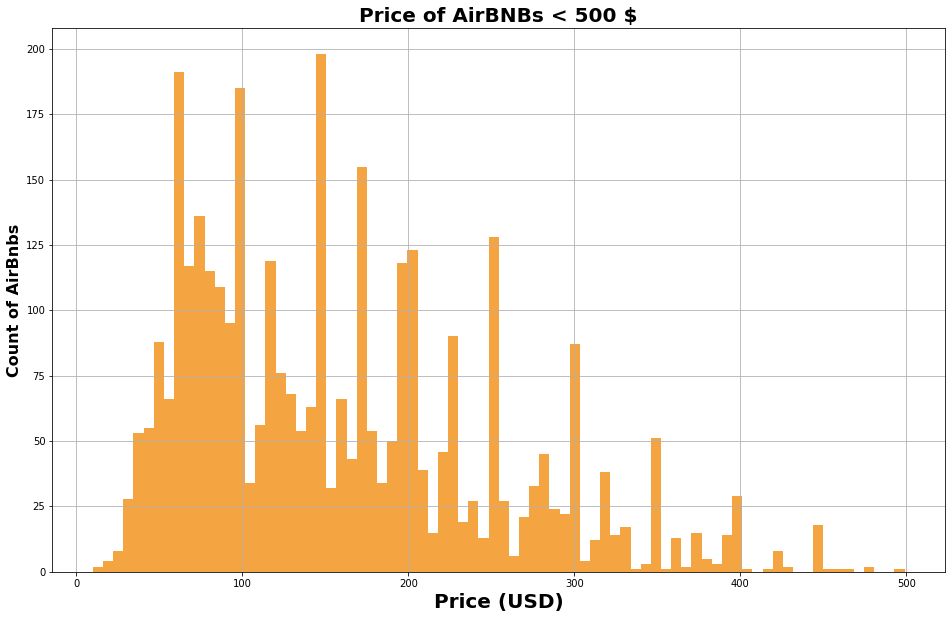

In [118]:
plt.figure(figsize=(16, 10));
listing_df[listing_df['price'] < 500]['price'].hist(bins=80, color="#f5a442");
plt.title('Price of AirBNBs < 500 $', size = 20, weight = 'bold');
plt.ylabel('Count of AirBnbs', size =16, weight = 'bold');
plt.xlabel('Price (USD)', size = 20,  weight = 'bold');

Above graph shows that there are 3495 AirBnb listings in Bostion with a price less than 500USD and most of them are in the range of 50-250 USD.

*Price Based on Property_type*

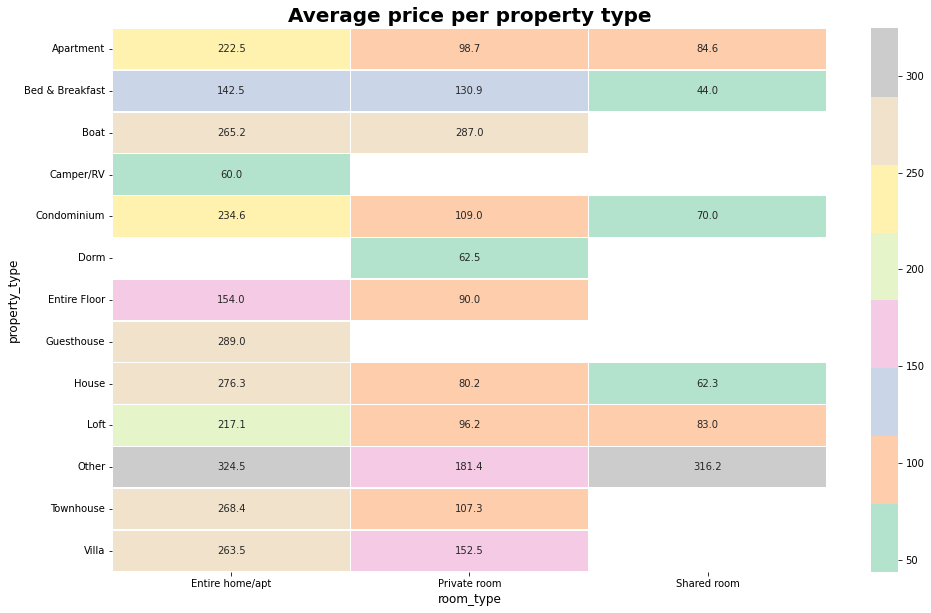

In [87]:

plt.figure(figsize=(16,10))
plt.title('Average price per property type', weight ='bold', size = 20);
plt.xlabel('room_type', size = 12)
plt.ylabel('property_type', size = 12)
sns.heatmap(listing_df.groupby(['property_type','room_type']).price.mean().unstack(), annot=True, fmt='.1f', linewidths= .5, cmap='Pastel2')

From the heatmap above we can clearly see that entire home/apartment room type has a tendency of being average priced room type among the all property types that are given. 

## Top Amenities

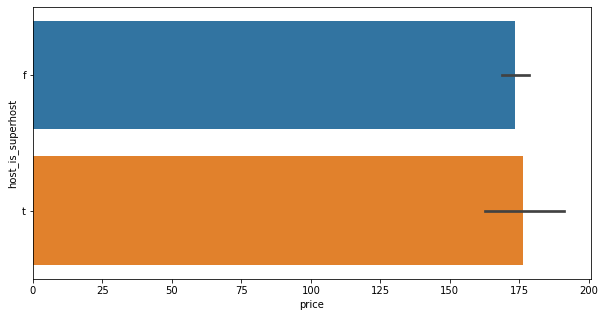

In [109]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.barplot(x='price', y='host_is_superhost', data=listing_df)

In [110]:
listing_df.groupby(['price', 'beds','bed_type','amenities','square_feet','security_deposit', 'cleaning_fee'])

In [111]:
listing_df['amenities'].head()

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [112]:
amenities = listing_df['amenities'].apply(lambda x: [a.replace('{', '').replace('}', '').replace('"', '') for a in x.split(',')])

In [113]:
mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(amenities), index=amenities.index, columns=mlb.classes_)
amenities_count=amenities_result.sum().sort_values(ascending=False)

Text(0.5, 0, 'Occurence')

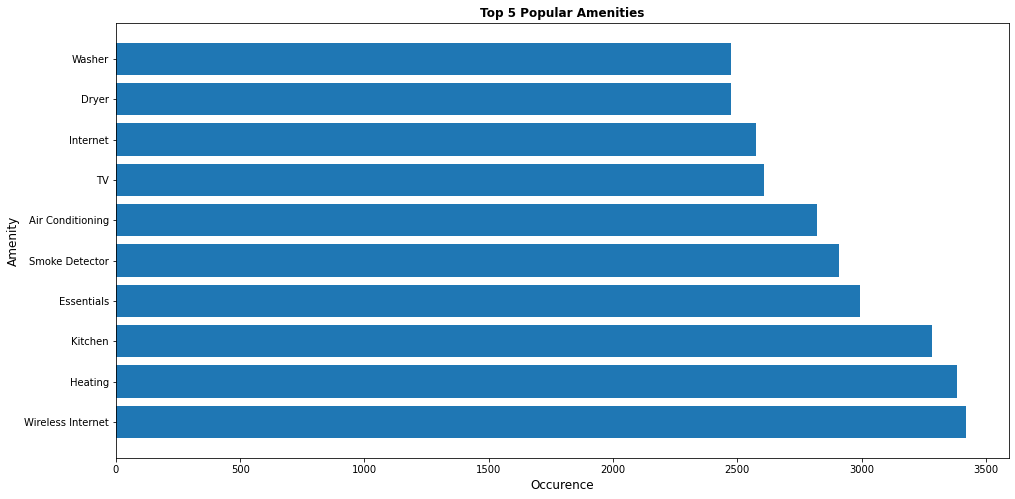

In [122]:
plt.figure(figsize=(16,8))
plt.barh(amenities_count[:10].index,amenities_count[:10].values)
plt.title('Top 5 Popular Amenities',weight='bold', size =12)
plt.ylabel('Amenity',size =12)
plt.xlabel('Occurence', size =12)

The histogram above depicts the top 10 amenities that visitors look for in the AirBnBs with Wi-Fi being the highest obviously and next to it are heating(which might change based on season) and Kitchen.